# Ivan's Exploratory Notebook

**Import modules and dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "../data/Employee.csv"

In [3]:
employee = pd.read_csv(data_dir)

## Data Size & Features Analyze

In [4]:
print("Number of Rows:", employee.shape[0],
      "\nNumber of Columns:", employee.shape[1])

Number of Rows: 4653 
Number of Columns: 9


In [5]:
print(employee.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [6]:
print(employee.isna().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


## Exploring Relationships

0 = Employee did not leave
1 = Employee did leave

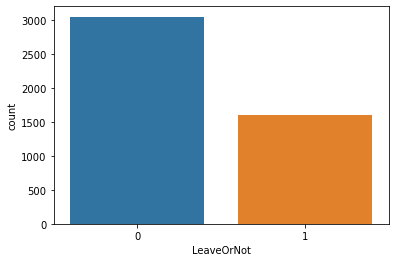

In [7]:
ax = sns.countplot(x="LeaveOrNot", data = employee)

~34% of employees left
~66% of the employees stayed

In [8]:
leave_or_not_count = employee['LeaveOrNot'].value_counts()
print(leave_or_not_count)

0    3053
1    1600
Name: LeaveOrNot, dtype: int64


Low correlation between predictor and independent variables

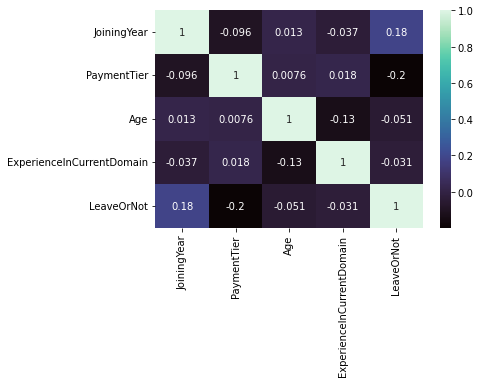

In [9]:
employee_corr = sns.heatmap(employee.corr(), cmap="mako", annot=True)
plt.show()

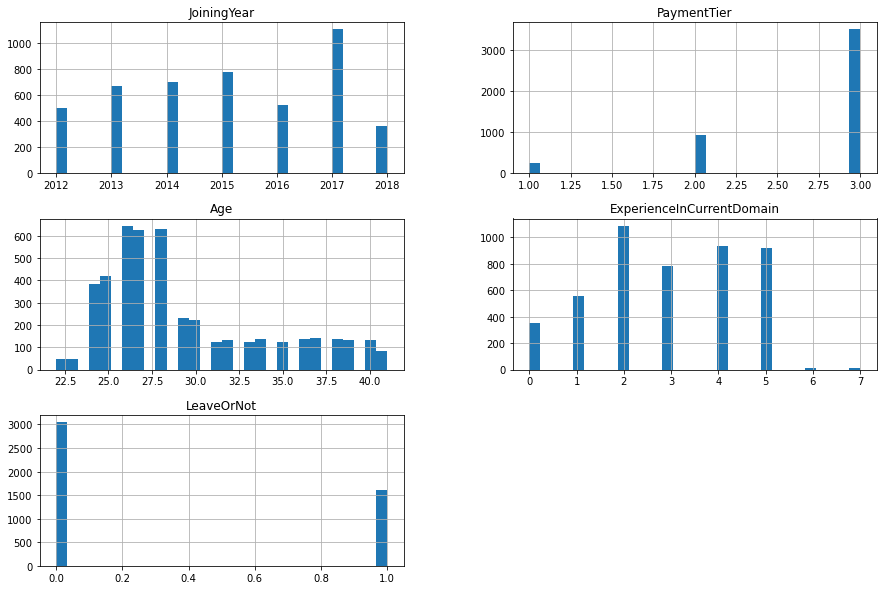

In [10]:
employee.hist(bins=30,figsize=(15,10))
plt.show()

## Transforming data features for further analysis

<AxesSubplot:ylabel='Gender'>

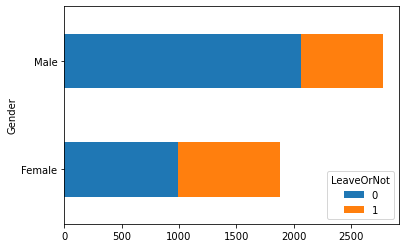

In [11]:
crosstab_gender = pd.crosstab(employee["Gender"], employee["LeaveOrNot"])
crosstab_gender.plot(kind="barh", stacked = True)

<AxesSubplot:ylabel='Gender'>

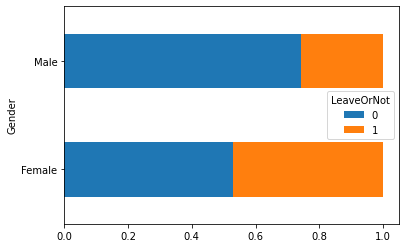

In [12]:
crosstab_norm_gender = crosstab_gender.div(crosstab_gender.sum(1),axis = 0)
crosstab_norm_gender.plot(kind="barh", stacked = True)

<AxesSubplot:ylabel='City'>

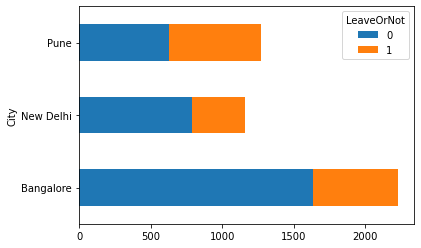

In [13]:
crosstab_city = pd.crosstab(employee["City"], employee["LeaveOrNot"])
crosstab_city.plot(kind="barh", stacked = True)

<AxesSubplot:ylabel='City'>

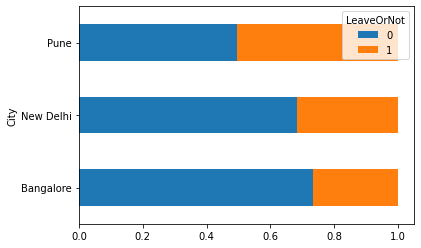

In [14]:
crosstab_norm_city = crosstab_city.div(crosstab_city.sum(1),axis = 0)
crosstab_norm_city.plot(kind="barh", stacked = True)

<AxesSubplot:ylabel='EverBenched'>

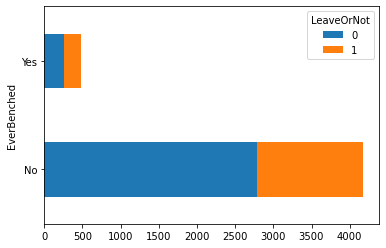

In [15]:
crosstab_benched = pd.crosstab(employee["EverBenched"], employee["LeaveOrNot"])
crosstab_benched.plot(kind="barh", stacked = True)

<AxesSubplot:ylabel='EverBenched'>

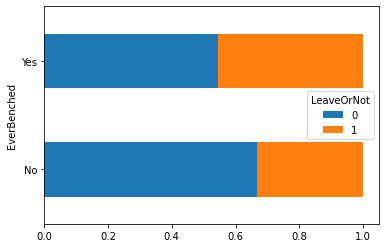

In [16]:
crosstab_norm_benched = crosstab_benched.div(crosstab_benched.sum(1),axis = 0)
crosstab_norm_benched.plot(kind="barh", stacked = True)

Normalizing Age for overlay histogram

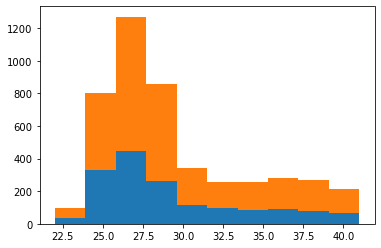

In [17]:
employee_leave_age = employee[employee.LeaveOrNot == 1]['Age']
employee_stay_age = employee[employee.LeaveOrNot == 0]['Age']
(n, bins, patches) = plt.hist([employee_leave_age, employee_stay_age], bins = 10, stacked = True)

In [18]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

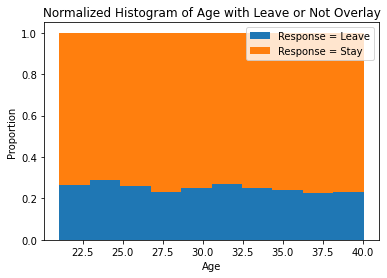

In [19]:
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0],bottom = n_norm[:,0])
plt.legend(['Response = Leave', 'Response = Stay'])
plt.title('Normalized Histogram of Age with Leave or Not Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion')
plt.show()

Based on findings age is not a strong indicator for an employee leaving or staying

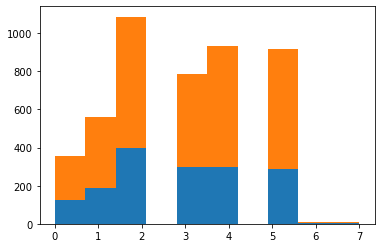

In [20]:
employee_leave_exp = employee[employee.LeaveOrNot == 1]['ExperienceInCurrentDomain']
employee_stay_exp = employee[employee.LeaveOrNot == 0]['ExperienceInCurrentDomain']
(n, bins, patches) = plt.hist([employee_leave_exp, employee_stay_exp], bins = 10, stacked = True)

In [21]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

/var/folders/ll/snp8v88x0dz1nl1l9yq19m680000gn/T/ipykernel_72060/2176952280.py:2: RuntimeWarning: invalid value encountered in true_divide
  n_norm = n_table / n_table.sum(axis=1)[:, None]


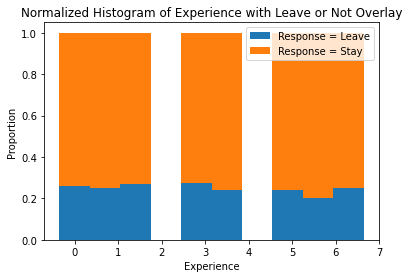

In [22]:
p1 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 0], width=ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 1], width=ourbins[:, 1] - ourbins[:, 0], bottom=n_norm[:, 0])
plt.legend(['Response = Leave', 'Response = Stay'])
plt.title('Normalized Histogram of Experience with Leave or Not Overlay')
plt.xlabel('Experience')
plt.ylabel('Proportion')
plt.show()

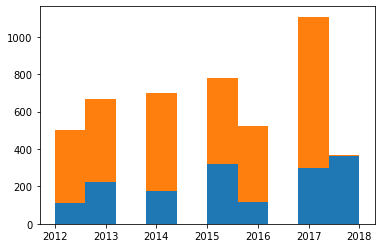

In [23]:
employee_leave_year = employee[employee.LeaveOrNot == 1]['JoiningYear']
employee_stay_year = employee[employee.LeaveOrNot == 0]['JoiningYear']
(n, bins, patches) = plt.hist([employee_leave_year, employee_stay_year], bins = 10, stacked = True)

In [24]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

/var/folders/ll/snp8v88x0dz1nl1l9yq19m680000gn/T/ipykernel_72060/2176952280.py:2: RuntimeWarning: invalid value encountered in true_divide
  n_norm = n_table / n_table.sum(axis=1)[:, None]


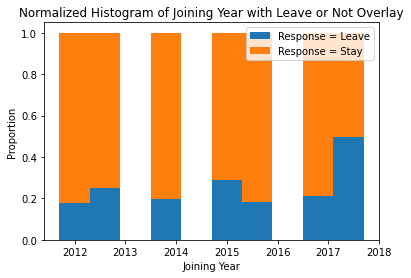

In [25]:
p1 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 0], width=ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 1], width=ourbins[:, 1] - ourbins[:, 0], bottom=n_norm[:, 0])
plt.legend(['Response = Leave', 'Response = Stay'])
plt.title('Normalized Histogram of Joining Year with Leave or Not Overlay')
plt.xlabel('Joining Year')
plt.ylabel('Proportion')
plt.show()

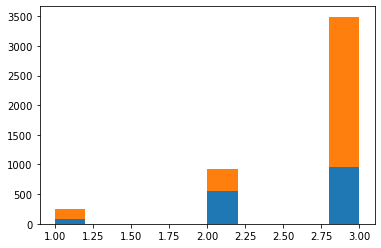

In [26]:
employee_leave_pay = employee[employee.LeaveOrNot == 1]['PaymentTier']
employee_stay_pay = employee[employee.LeaveOrNot == 0]['PaymentTier']
(n, bins, patches) = plt.hist([employee_leave_pay, employee_stay_pay], bins = 10, stacked = True)

In [27]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

/var/folders/ll/snp8v88x0dz1nl1l9yq19m680000gn/T/ipykernel_72060/2176952280.py:2: RuntimeWarning: invalid value encountered in true_divide
  n_norm = n_table / n_table.sum(axis=1)[:, None]


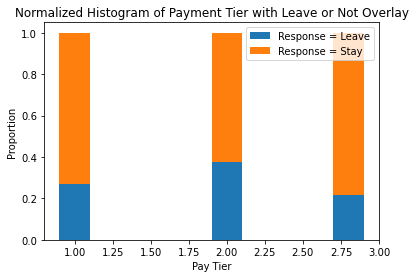

In [28]:
p1 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 0], width=ourbins[:, 1] - ourbins[:, 0])
p2 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 1], width=ourbins[:, 1] - ourbins[:, 0], bottom=n_norm[:, 0])
plt.legend(['Response = Leave', 'Response = Stay'])
plt.title('Normalized Histogram of Payment Tier with Leave or Not Overlay')
plt.xlabel('Pay Tier')
plt.ylabel('Proportion')
plt.show()

## Conclusion

Based on normalized graphs an initial hypothesis is established:
LeaveOrNot ~ City + Gender + Joining Year